# Fundamentals-Assessment

Why use Python Seaborn?
As mentioned earlier, the Python Seaborn library is used to ease the challenging task of data visualization and it’s based on Matplotlib. Seaborn allows the creation of statistical graphics through the following functionalities:

An API that is based on datasets allowing comparison between multiple variables

Supports multi-plot grids that in turn ease building complex visualizations

Univariate and bivariate visualizations available to compare between subsets of data

Availability of different color palettes to reveal various kinds of patterns

Estimates and plots linear regression automatically

In [46]:
# Import Pandas for managing datasets
# Import matplotlib for additional customisation
# Import Seaborn for plotting and styling
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [47]:
# Load the tips dataset from Seaborn
tips = sns.load_dataset("tips")

In [48]:
# look at first five rows of dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
# look at last five rows of dataset
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [50]:
# Overview of the dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [51]:
# Groups the dataset by the sex column
group = tips.groupby("sex")

In [52]:
group.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [53]:
# View of first group
group.first()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Female,16.99,1.01,No,Sun,Dinner,2


In [54]:
# View the smokers
smoker = tips.groupby("smoker")

In [55]:
smoker.first()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
Yes,38.01,3.00,Male,Sat,Dinner,4
No,16.99,1.01,Female,Sun,Dinner,2


In [56]:
group.last()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,17.82,1.75,No,Sat,Dinner,2
Female,18.78,3.00,No,Thur,Dinner,2


In [57]:
group.sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [58]:
# Take a look at the average tip 
group.mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [59]:
# View based on a numeric location
tips.iloc[5:12]

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4


In [60]:
# Average tip based on smokers
tips.loc[tips["smoker"]=="Yes"].mean()

total_bill    20.756344
tip            3.008710
size           2.408602
dtype: float64

In [61]:
# Average tip based on non-smoker
tips.loc[tips["smoker"]=="No"].mean()

total_bill    19.188278
tip            2.991854
size           2.668874
dtype: float64

# Visualising the Tips Dataset

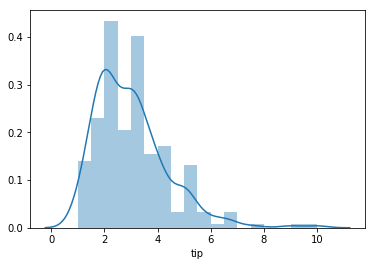

In [62]:
# Distribution plot for tip values
sns.distplot(tips["tip"])

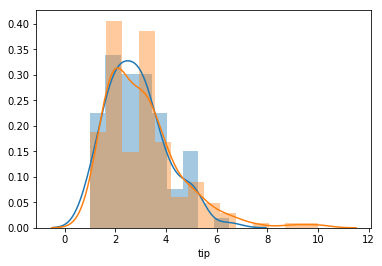

In [63]:
# Distribution plot based on Female and Male customers
Female = tips.loc[tips["sex"] == "Female", ["sex", "tip"]]
Male = tips.loc[tips["sex"] == "Male", ["sex", "tip"]]

sns.distplot(Female["tip"])
sns.distplot(Male["tip"])

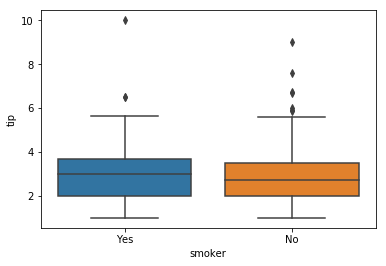

In [64]:
# Boxplot to compare tips if smoker or non-smoker
sns.boxplot(x = "smoker", y = "tip", data = tips)

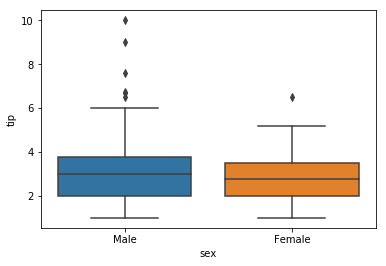

In [65]:
# Boxplot to compare if Male or Female
sns.boxplot(x = "sex", y = "tip", data = tips)

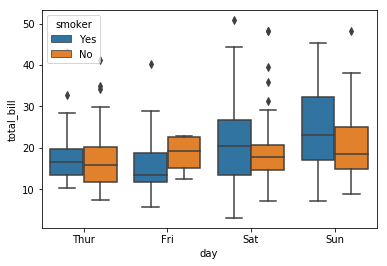

In [66]:
# Boxplot to view the total bill by the days of the week for smokers and non-smokers
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips)

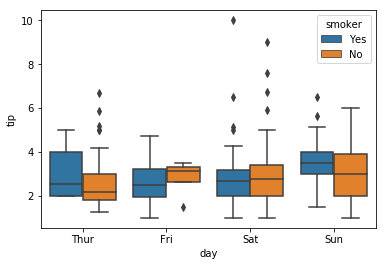

In [67]:
# Boxplot to view the tips by the days of the week for smokers and non-smokers
sns.boxplot(x = "day", y = "tip", hue = "smoker", data = tips)

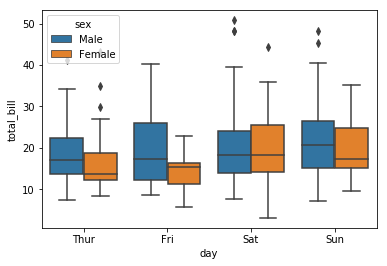

In [68]:
# Boxplot to view the total bill by the days of the week for male and female
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = tips)

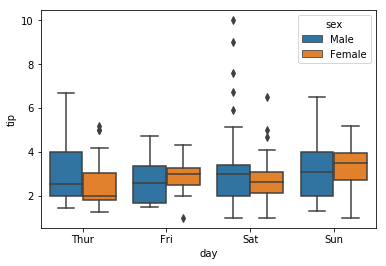

In [69]:
# Boxplot to view the tips by the days of the week for male and female
sns.boxplot(x = "day", y = "tip", hue = "sex", data = tips)

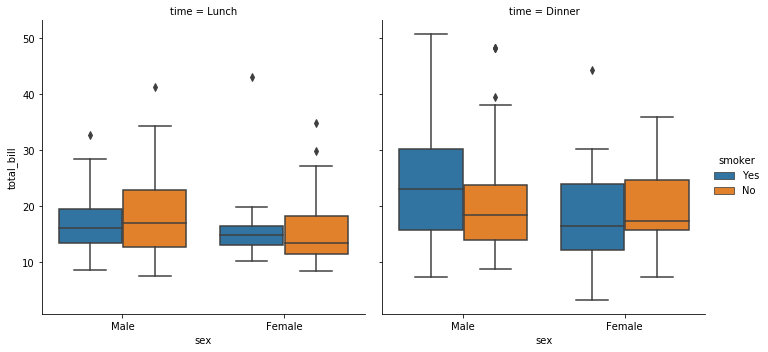

In [70]:
# catplot to group the total_bill data and include time
sns.catplot(x = "sex", y = "total_bill",
                    hue = "smoker", col = "time",
                    data = tips, kind= "box")

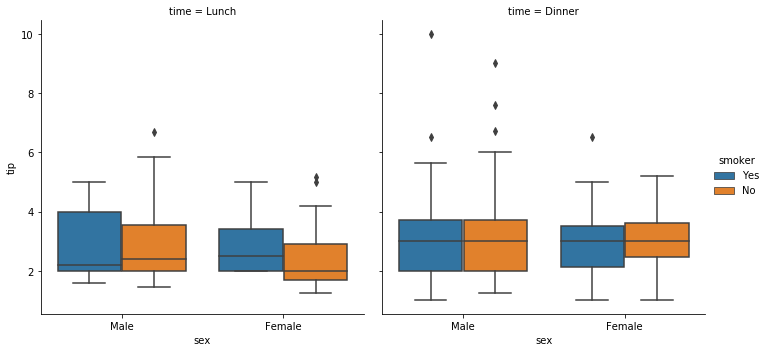

In [71]:
# catplot to group the tip and include time
sns.catplot(x = "sex", y = "tip",
                    hue = "smoker", col = "time",
                    data = tips, kind= "box")

## Histogram
**********explain what is visible from histogram

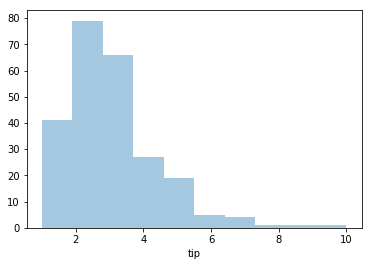

In [72]:
# Histogram
sns.distplot(tips['tip'], kde=False, bins=10);

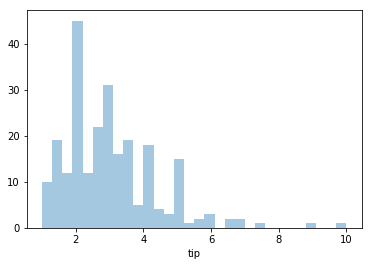

In [73]:
# View with a larger bins value to view a more accurate result
sns.distplot(tips['tip'], kde=False, bins=30);


## Kerner Density Estimate (KDE)
KDE is a way to estimpte the probability density function of a continuous random variable.  It is used when you need to know the distribution of the variable

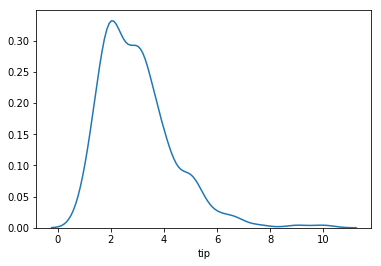

In [74]:
# KDE Plot
sns.distplot(tips['tip'],hist=False, bins=10);

# Pair Plot

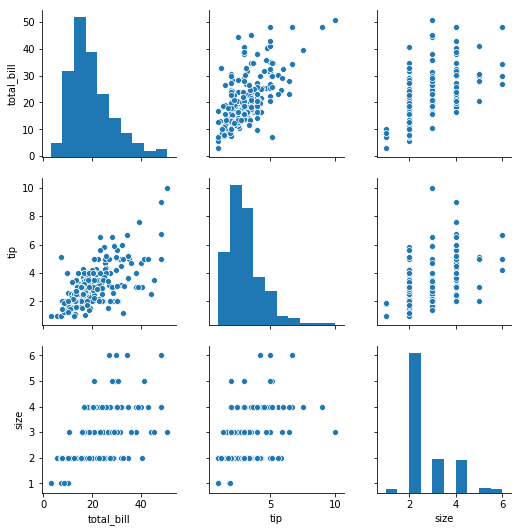

In [75]:
sns.pairplot(tips)